In [13]:
import pandas as pd #importing datasets
import matplotlib.pyplot as plt

athletes = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-07-27/athlete_events.csv")

countries = pd.read_csv("https://raw.githubusercontent.com/google/dspl/master/samples/google/canonical/countries.csv")

#Section 1: Matplotlib

##1. Bar graph of the top 5 countries with highest number of atheltes

In [4]:
unique_df = athletes.drop_duplicates(subset='Name')
unique_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 134732 entries, 0 to 271114
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      134732 non-null  int64  
 1   Name    134732 non-null  object 
 2   Sex     134732 non-null  object 
 3   Age     128411 non-null  float64
 4   Height  101003 non-null  float64
 5   Weight  100030 non-null  float64
 6   Team    134732 non-null  object 
 7   NOC     134732 non-null  object 
 8   Games   134732 non-null  object 
 9   Year    134732 non-null  int64  
 10  Season  134732 non-null  object 
 11  City    134732 non-null  object 
 12  Sport   134732 non-null  object 
 13  Event   134732 non-null  object 
 14  Medal   19035 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 16.4+ MB


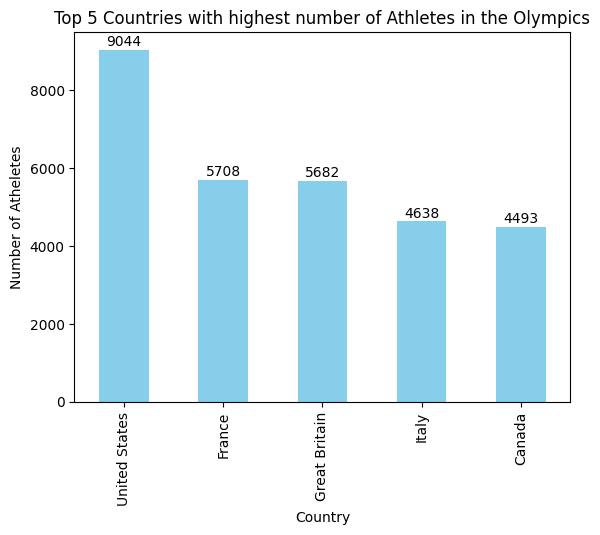

In [20]:
top_5 = unique_df.Team.value_counts().head(5)
top_5.plot(kind = 'bar', color = 'skyblue')

plt.title('Top 5 Countries with highest number of Athletes in the Olympics')
plt.xlabel('Country')
plt.ylabel('Number of Athletes')

for i, count in enumerate(top_5):
    plt.text(i,count + 100, count, ha='center')

plt.show()

##2. Bar chart showing athletes counts by season

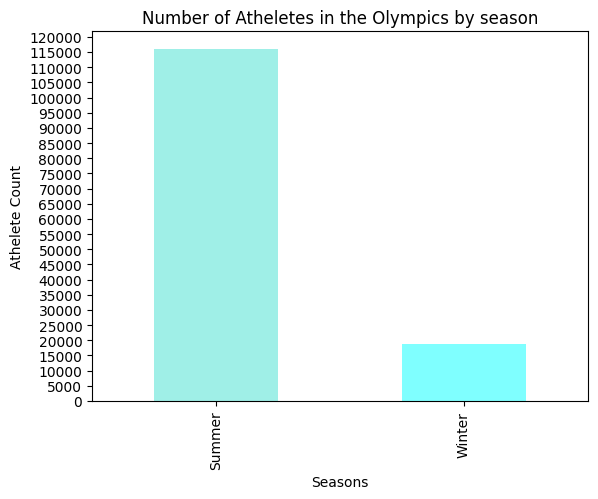

In [30]:
import numpy as np
sns_athlts = unique_df.Season.value_counts()

sns_athlts.plot(kind = 'bar', color = ['turquoise','cyan'], alpha = 0.5)
plt.xlabel('Seasons')
plt.yticks(np.arange(0, sns_athlts.max() + 5000, 5000))
plt.ylabel('Athelete Count')
plt.title('Number of Atheletes in the Olympics by season')

plt.show()

##3. Stacked bar graph for each medal type by gender

In [42]:
medalists = unique_df.dropna(subset = 'Medal')
medal_counts = medalists.groupby(['Sex','Medal']).size().unstack()
medal_counts.head()

Medal,Bronze,Gold,Silver
Sex,,,
F,1601,1528,1566
M,4911,4769,4660


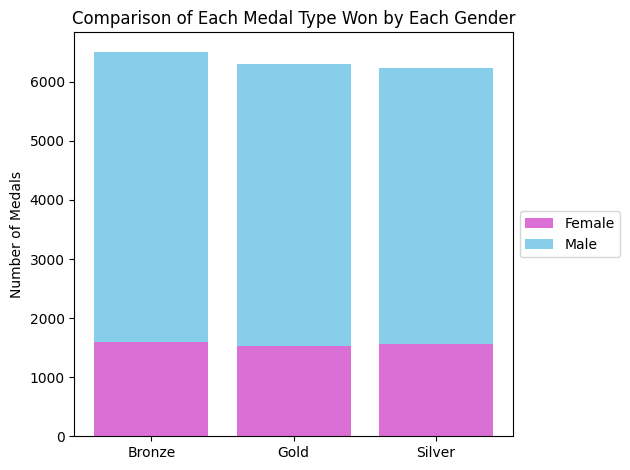

In [44]:
x = range(len(medal_counts.columns))

plt.bar(x, medal_counts.loc['F'], label='Female', color='orchid')
plt.bar(x, medal_counts.loc['M'], bottom=medal_counts.loc['F'], label='Male', color='skyblue')

plt.xticks(x, medal_counts.columns)
plt.ylabel('Number of Medals')
plt.title('Comparison of Each Medal Type Won by Each Gender')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

plt.show()

##4. Scatterplot of weight against age of athletes

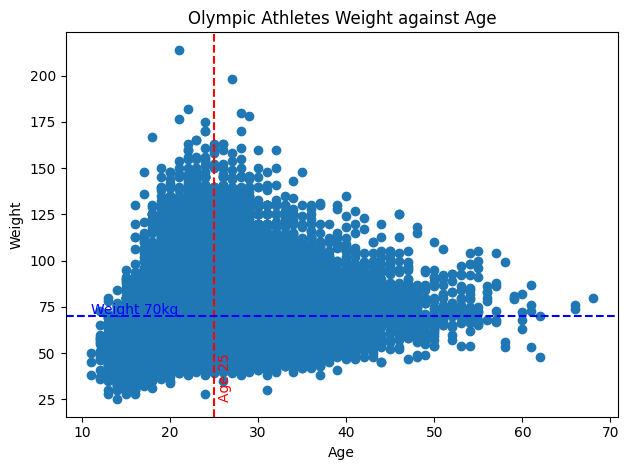

In [68]:
valid_Bmi = unique_df.dropna(subset = ['Age','Weight'])
Ages = valid_Bmi.Age
Weights = valid_Bmi.Weight

plt.scatter(Ages, Weights)

plt.axvline(x=25, color='red', linestyle='--', linewidth=1.5, label='Age = 25')
plt.axhline(y=70, color='blue', linestyle='--', linewidth=1.5, label='Weight = 70kg')

plt.text(25 + 0.5, Weights.min(), 'Age 25', color='red', rotation=90)
plt.text(Ages.min(), 70 + 1, 'Weight 70kg', color='blue')

plt.xlabel('Age')
plt.ylabel('Weight')
plt.title('Olympic Athletes Weight against Age')

plt.tight_layout()
plt.show()

##5. Figure with scatter plot subplots for athletes height versus weight for Athletics, Gymnastics, Swimming and Cycling

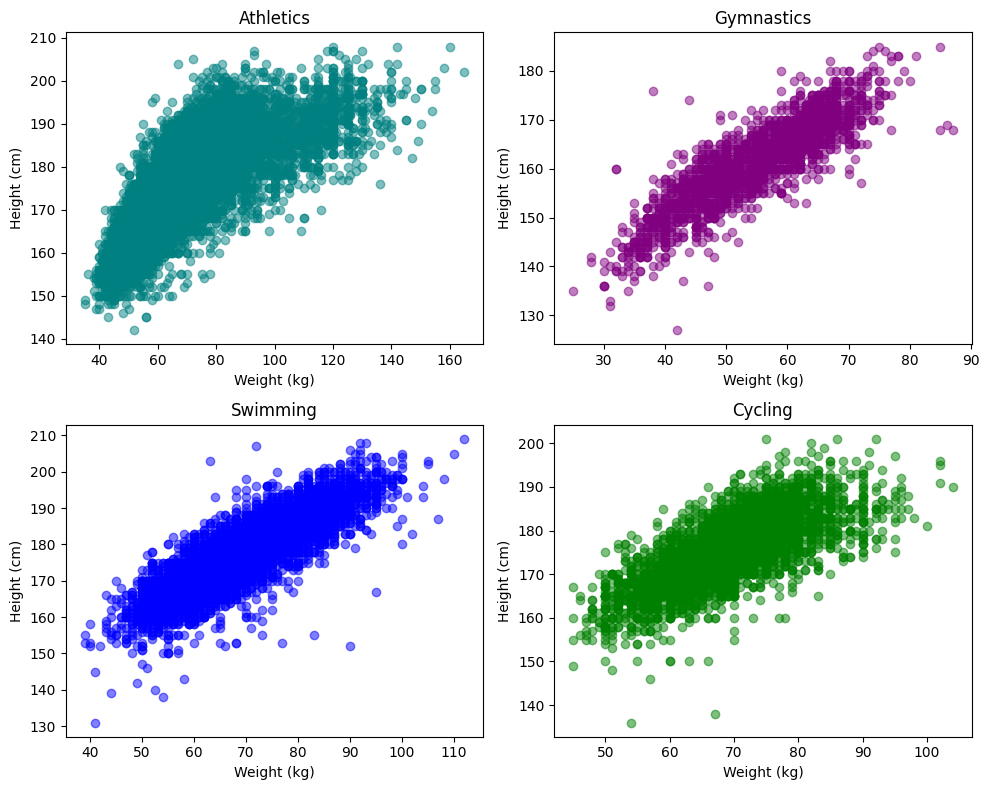

In [72]:
valid_measures = unique_df.dropna(subset=['Height', 'Weight'])

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Athletics
athletics = valid_measures[valid_measures.Sport == 'Athletics']
axs[0, 0].scatter(athletics['Weight'], athletics['Height'], alpha=0.5, color='teal')
axs[0, 0].set_title('Athletics')
axs[0, 0].set_xlabel('Weight (kg)')
axs[0, 0].set_ylabel('Height (cm)')

# Gymnastics
gymnastics = valid_measures[valid_measures.Sport == 'Gymnastics']
axs[0, 1].scatter(gymnastics['Weight'], gymnastics['Height'], alpha=0.5, color='purple')
axs[0, 1].set_title('Gymnastics')
axs[0, 1].set_xlabel('Weight (kg)')
axs[0, 1].set_ylabel('Height (cm)')

# Swimming
swimming = valid_measures[valid_measures.Sport == 'Swimming']
axs[1, 0].scatter(swimming['Weight'], swimming['Height'], alpha=0.5, color='blue')
axs[1, 0].set_title('Swimming')
axs[1, 0].set_xlabel('Weight (kg)')
axs[1, 0].set_ylabel('Height (cm)')

# Cycling
cycling = valid_measures[valid_measures.Sport == 'Cycling']
axs[1, 1].scatter(cycling['Weight'], cycling['Height'], alpha=0.5, color='green')
axs[1, 1].set_title('Cycling')
axs[1, 1].set_xlabel('Weight (kg)')
axs[1, 1].set_ylabel('Height (cm)')

# Layout and show
plt.tight_layout()
plt.show()


##6. Line graphs for number of athletes per hear and average height per year

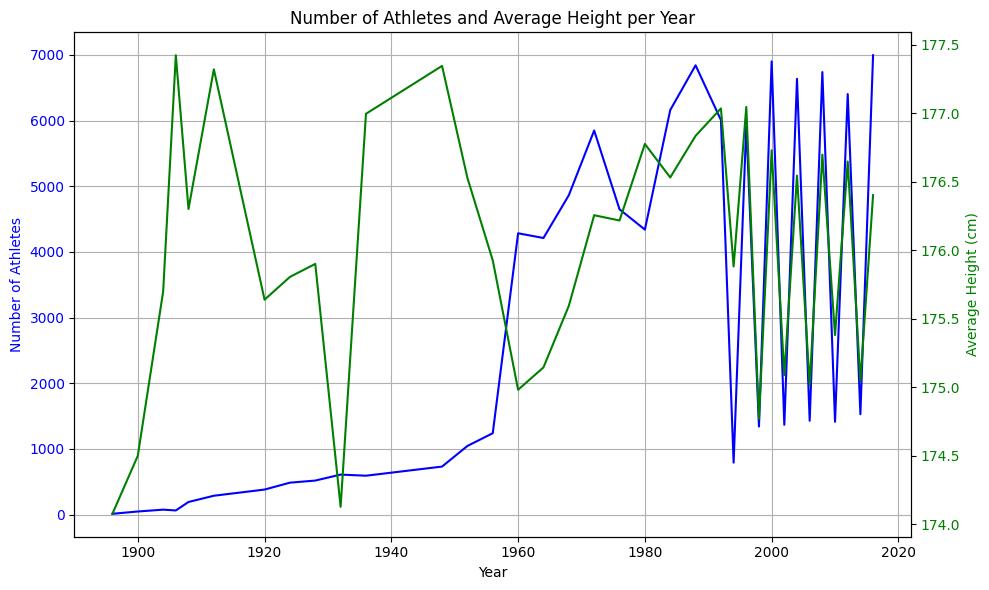

In [80]:
valid_data = unique_df.dropna(subset=['Height'])

athletes_per_year = valid_data.groupby('Year')['ID'].nunique()
avg_height_per_year = valid_data.groupby('Year')['Height'].mean()

fig, ax1 = plt.subplots(figsize=(10, 6))


ax1.plot(athletes_per_year.index, athletes_per_year.values, color='blue', label='Number of Athletes')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Athletes', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')


ax2 = ax1.twinx()

ax2.plot(avg_height_per_year.index, avg_height_per_year.values, color='green', label='Average Height')
ax2.set_ylabel('Average Height (cm)', color='green')
ax2.tick_params(axis='y', labelcolor='green')


plt.title('Number of Athletes and Average Height per Year')
ax1.grid(True)

plt.tight_layout()
plt.show()


#Section 2: Seaborn

##1. Height distribution by gender

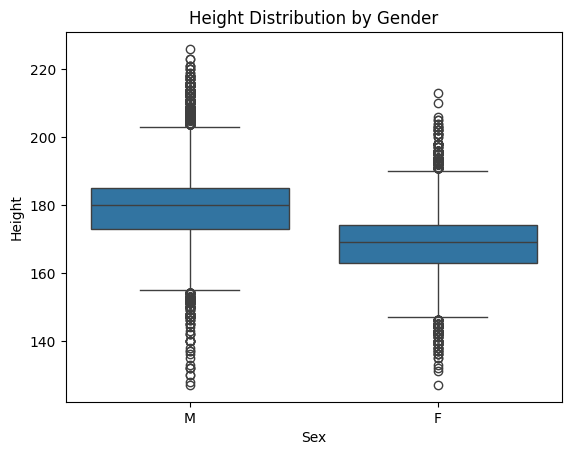

In [73]:
import seaborn as sns

height_data = unique_df.dropna(subset=['Height', 'Sex'])

sns.boxplot(data=height_data, x='Sex', y='Height')

plt.title('Height Distribution by Gender')
plt.show()

##2. Histogram of athlete ages

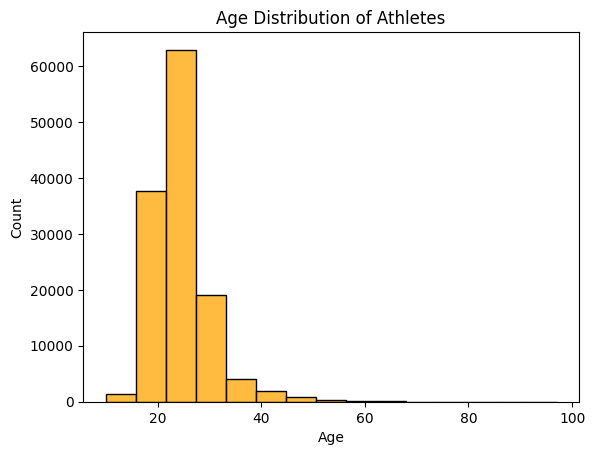

In [74]:
age_data = unique_df.dropna(subset=['Age'])

sns.histplot(age_data['Age'], bins=15, kde=False, color='orange')

plt.title('Age Distribution of Athletes')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

#Section 3: Plotly

##1. Average height per year for Basketball, Volleyball, Athletics

In [77]:
import plotly.express as px

sports = ['Basketball', 'Volleyball', 'Athletics']
filtered_df = unique_df.dropna(subset=['Height', 'Year', 'Sport'])
filtered_df = filtered_df[filtered_df['Sport'].isin(sports)]

avg_height = filtered_df.groupby(['Year', 'Sport'])['Height'].mean().reset_index()

fig = px.line(avg_height, x='Year', y='Height', color='Sport',
              title='Average Athlete Height per Year by Sport')

fig.show()

#Section 4: Folium

##1. Locations of  Kenya, Uganda, Burundi and Rwanda on a map

In [79]:
import folium

m = folium.Map(location=[-1.0, 34.0], zoom_start=6)

target_countries = ['Kenya', 'Uganda', 'Burundi', 'Rwanda']
filtered = countries[countries['name'].isin(target_countries)]

for _, row in filtered.iterrows():
    color = 'red' if row['name'] == 'Kenya' else 'gray'
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=row['name'],
        icon=folium.Icon(color=color)
    ).add_to(m)

m
